In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from ggplot import *
import pickle
import feather
from collections import Counter

In [2]:
sample = feather.read_dataframe("./sample.feather")

In [3]:
sample.head()

,video_id,duration,title,channel_id,channel_title,published_at,views,likes,dislikes,comments
0,--DwgB78t-c,PT2M36S,Fruto Dulce - Geraldine Rojas & Ezequiel Paludi 3,UCdzU3DSGzyWzN2118yd9X9g,Abdullah AYDIN,2012-01-19 18:20:02,1671,10,1,0
1,--NZRkXBV7k,PT4M53S,Carlos Santana presents Cindy Blackman in Mexi...,UC0UnhAG47DRyVZGVcbhAXhQ,Saul TP,2015-03-30 04:04:40,9994,41,3,2
2,--hoQ2sGG4M,PT4M35S,"Taoist monk Tian Xin Shan in Brazil,Wudang San...",UCXjtAvK5P3wXBGh0vbGylzg,TheTVtaoista,2009-08-07 06:36:33,3407,8,1,2
3,--sBoaqBlzA,PT8M19S,"MAKEUP FOR GUYS: Actors, TV Hosts, On Camera ...",UCeKHMeUlcLNPLCLUfZUQI2w,Tiffany Hendra,2011-08-04 00:47:49,15816,120,2,8
4,--7h1S4neDM,PT3M19S,Pet Rescue Saga Level 539 2 Stars No Boosts,UCNWPDyaWf2eAHnofFLSnEMg,All Gamers,2014-04-29 15:44:44,2167,1,0,0


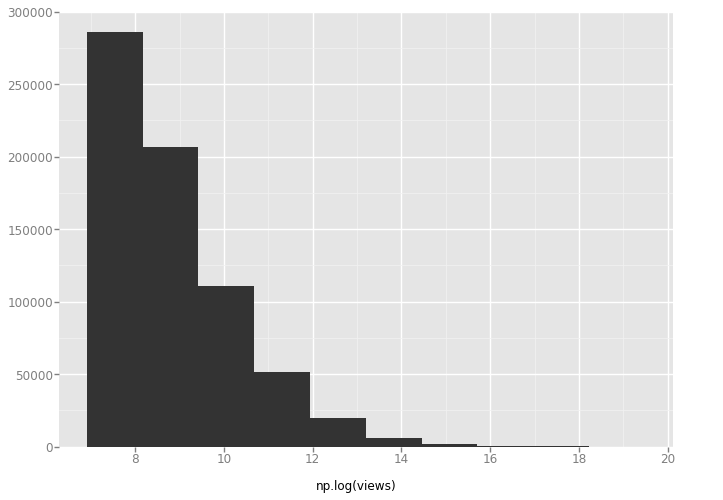

<ggplot: (8789712417849)>

In [4]:
ggplot(sample, aes(x='np.log(views)')) + geom_histogram()

In [5]:
video_date = sample.ix[:, [0, 5, 6]]

In [6]:
video_date.head()

,video_id,published_at,views
0,--DwgB78t-c,2012-01-19 18:20:02,1671
1,--NZRkXBV7k,2015-03-30 04:04:40,9994
2,--hoQ2sGG4M,2009-08-07 06:36:33,3407
3,--sBoaqBlzA,2011-08-04 00:47:49,15816
4,--7h1S4neDM,2014-04-29 15:44:44,2167


In [7]:
video_date = video_date.set_index(pd.DatetimeIndex(video_date['published_at']))

In [8]:
video_date.head()

,video_id,published_at,views
published_at,,,
2012-01-19 18:20:02,--DwgB78t-c,2012-01-19 18:20:02,1671
2015-03-30 04:04:40,--NZRkXBV7k,2015-03-30 04:04:40,9994
2009-08-07 06:36:33,--hoQ2sGG4M,2009-08-07 06:36:33,3407
2011-08-04 00:47:49,--sBoaqBlzA,2011-08-04 00:47:49,15816
2014-04-29 15:44:44,--7h1S4neDM,2014-04-29 15:44:44,2167


In [9]:
date_cnt = video_date.groupby(pd.TimeGrouper(freq='3M')).size()

In [10]:
date_cnt.head()

published_at
2005-08-31       2
2005-11-30      44
2006-02-28     189
2006-05-31     965
2006-08-31    2165
Freq: 3M, dtype: int64

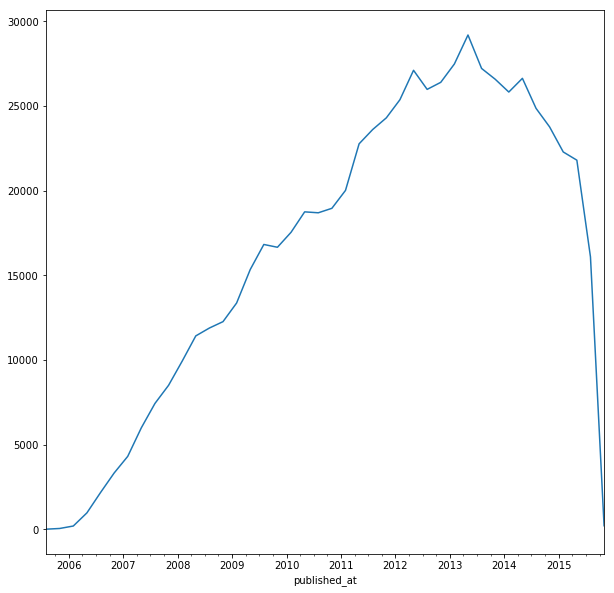

In [11]:
plt.figure(figsize=(10, 10))
date_cnt.plot(kind='line')

In [12]:
date_view_cnt = video_date.groupby(pd.TimeGrouper(freq='3M'))['views'].median()

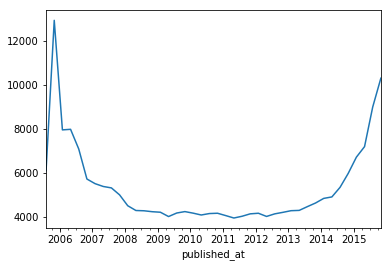

In [13]:
date_view_cnt.plot()

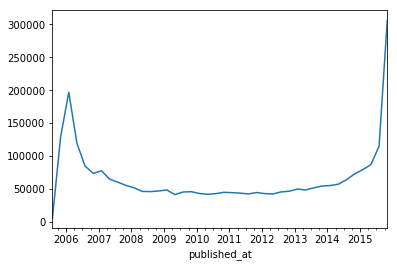

In [14]:
video_date.groupby(pd.TimeGrouper(freq='3M'))['views'].quantile(0.9).plot()

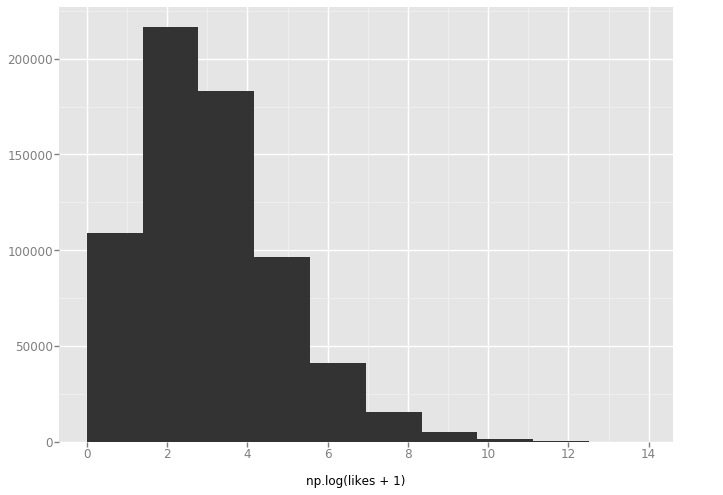

<ggplot: (-9223363247323017191)>

In [98]:
ggplot(sample.query('likes >= 0'), aes(x='np.log(likes + 1)')) + geom_histogram()

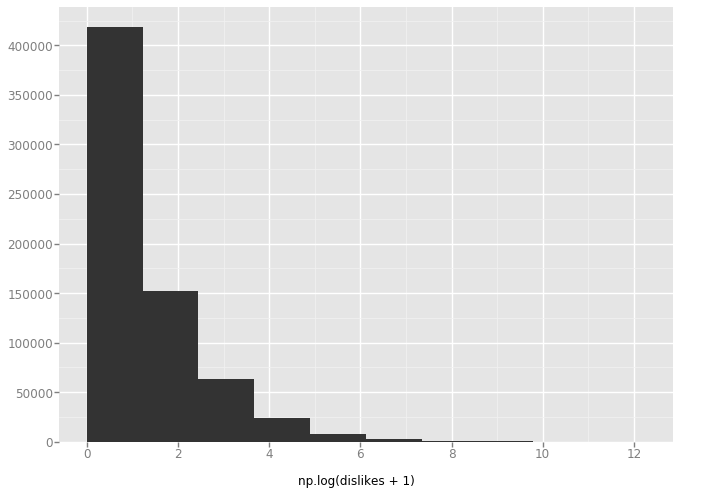

<ggplot: (8789531840411)>

In [97]:
ggplot(sample.query('dislikes >= 0'), aes(x='np.log(dislikes + 1)')) + geom_histogram()

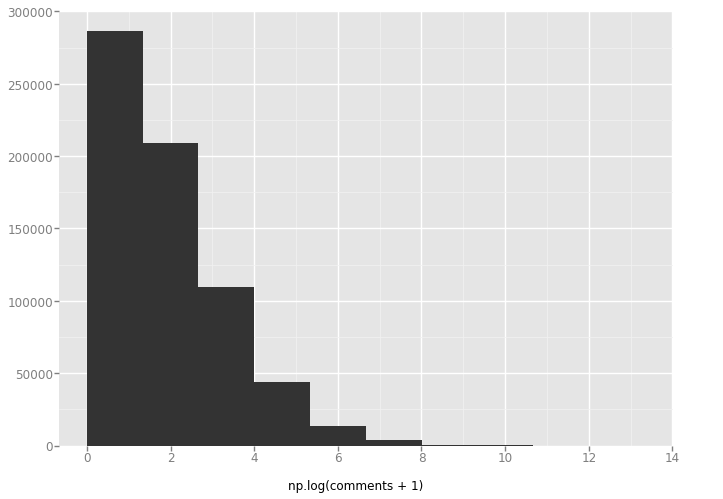

<ggplot: (-9223363247323047536)>

In [99]:
ggplot(sample.query('comments >= 0'), aes(x='np.log(comments + 1)')) + geom_histogram()

In [18]:
durations = pd.to_timedelta(sample['duration'].apply(lambda s: s[2:]))

In [19]:
seconds = durations.apply(lambda x: x.components.minutes * 60 + x.components.seconds)

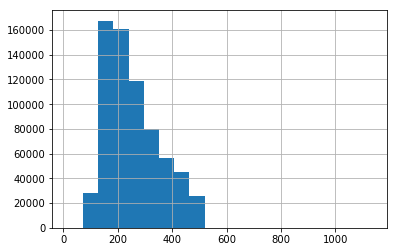

In [20]:
seconds.hist(bins=20)

In [21]:
seconds.describe()

count    681819.000000
mean        254.907602
std          98.643866
min          16.000000
25%         175.000000
50%         234.000000
75%         318.000000
max        1135.000000
Name: duration, dtype: float64

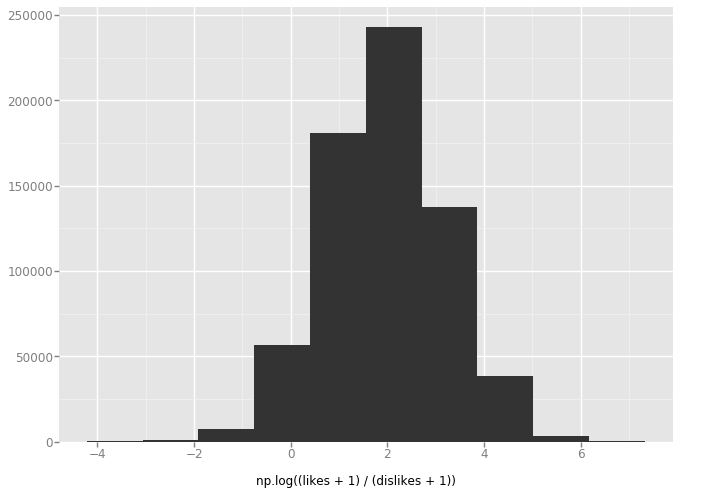

<ggplot: (-9223363247323031513)>

In [100]:
ggplot(sample.query('dislikes >= 0 and likes >= 0'), aes(x='np.log((likes + 1) / (dislikes + 1))')) + geom_histogram()

In [24]:
channel_cnt = sample.groupby('channel_id').size()

In [30]:
top = channel_cnt.sort_values(ascending=False)[:20]
top

channel_id
UCQlGBspQdj17WOPBQMT1k9A    364
UCI-Oq7oFGakzSzHFlTtsUsQ    320
UCppHT7SZKKvar4Oc9J4oljQ    243
UC3gNmTGu-TTbFPpfSs5kNkg    208
UCe52oeb7Xv_KaJsEzcKXJJg    188
UCcMTZY1rFXO3Rj44D5VMyiw    181
UCbu2SsF-Or3Rsn3NxqODImw    161
UCqFMzb-4AUf6WAIbl132QKA    156
UCqYw-CTd1dU2yGI71sEyqNw    155
UCJ5v_MCY6GNUBTO8-D3XoAg    153
UCotI-SqRXnkAZX4bMqlRNjw    150
UCybPtozyD1bAlzo3ubKR5GA    143
UCYZv9v_bwfMGc64gLRe34OA    133
UCE2606prvXQc_noEqKxVJXA    131
UCeMsqI6jU9WE2ctsrbxbywQ    124
UCmjNKt6kITwaZTqvWuaSPLg    122
UCS_hnpJLQTvBkqALgapi_4g    118
UCSpVHeDGr9UbREhRca0qwsA    107
UChI4p4l9OlVJ41c6AYQBtlw    101
UClzCn8DxRSCuMFv_WfzkcrQ    100
dtype: int64

In [42]:
sample.query('channel_id == @top.index[5]').head()

,video_id,duration,title,channel_id,channel_title,published_at,views,likes,dislikes,comments
5369,-VN2g1Tl9Xs,PT5M53S,Mass Effect 2 DLC & Splinter Cell Delay: 01/23/10,UCcMTZY1rFXO3Rj44D5VMyiw,Machinima,2010-01-23 16:53:13,122753,1365,284,1031
8112,5uAq2JkYE0k,PT5M7S,The Last Ones Left ep 1. (GTAIV machinima),UCcMTZY1rFXO3Rj44D5VMyiw,Machinima,2009-06-15 17:13:01,14723,300,265,146
9813,5wdaar6XY9A,PT8M10S,"NCAA Football 12: The Pigskin Pro Epi 8, The B...",UCcMTZY1rFXO3Rj44D5VMyiw,Machinima,2011-10-27 22:57:04,2983,19,9,31
14071,5zj_L45gmpw,PT6M54S,"IGDaily - Modern Warfare 3, DCUO Free2Play, Ne...",UCcMTZY1rFXO3Rj44D5VMyiw,Machinima,2011-09-19 23:30:00,82226,875,44,388
20428,63PkkuUAU4w,PT5M22S,"Prince of Persia Walkthru - pt.1: ""The Hunter""...",UCcMTZY1rFXO3Rj44D5VMyiw,Machinima,2008-12-26 23:14:21,122801,247,36,117


In [43]:
sample['duration'] = durations

In [44]:
sample.head()

,video_id,duration,title,channel_id,channel_title,published_at,views,likes,dislikes,comments
0,--DwgB78t-c,00:02:36,Fruto Dulce - Geraldine Rojas & Ezequiel Paludi 3,UCdzU3DSGzyWzN2118yd9X9g,Abdullah AYDIN,2012-01-19 18:20:02,1671,10,1,0
1,--NZRkXBV7k,00:04:53,Carlos Santana presents Cindy Blackman in Mexi...,UC0UnhAG47DRyVZGVcbhAXhQ,Saul TP,2015-03-30 04:04:40,9994,41,3,2
2,--hoQ2sGG4M,00:04:35,"Taoist monk Tian Xin Shan in Brazil,Wudang San...",UCXjtAvK5P3wXBGh0vbGylzg,TheTVtaoista,2009-08-07 06:36:33,3407,8,1,2
3,--sBoaqBlzA,00:08:19,"MAKEUP FOR GUYS: Actors, TV Hosts, On Camera ...",UCeKHMeUlcLNPLCLUfZUQI2w,Tiffany Hendra,2011-08-04 00:47:49,15816,120,2,8
4,--7h1S4neDM,00:03:19,Pet Rescue Saga Level 539 2 Stars No Boosts,UCNWPDyaWf2eAHnofFLSnEMg,All Gamers,2014-04-29 15:44:44,2167,1,0,0


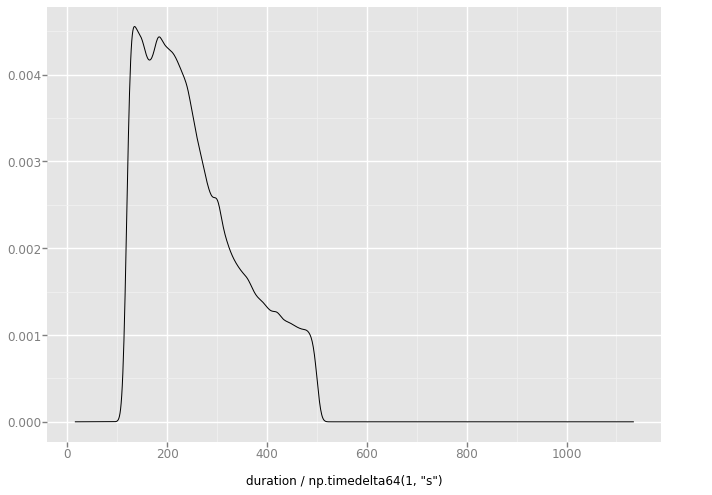

<ggplot: (8789673661609)>

In [54]:
ggplot(sample, aes(x='duration / np.timedelta64(1, "s")')) + geom_density()

In [72]:
sample['seconds'] = seconds

In [73]:
sample.head()

,video_id,duration,title,channel_id,channel_title,published_at,views,likes,dislikes,comments,seconds
0,--DwgB78t-c,00:02:36,Fruto Dulce - Geraldine Rojas & Ezequiel Paludi 3,UCdzU3DSGzyWzN2118yd9X9g,Abdullah AYDIN,2012-01-19 18:20:02,1671,10,1,0,156
1,--NZRkXBV7k,00:04:53,Carlos Santana presents Cindy Blackman in Mexi...,UC0UnhAG47DRyVZGVcbhAXhQ,Saul TP,2015-03-30 04:04:40,9994,41,3,2,293
2,--hoQ2sGG4M,00:04:35,"Taoist monk Tian Xin Shan in Brazil,Wudang San...",UCXjtAvK5P3wXBGh0vbGylzg,TheTVtaoista,2009-08-07 06:36:33,3407,8,1,2,275
3,--sBoaqBlzA,00:08:19,"MAKEUP FOR GUYS: Actors, TV Hosts, On Camera ...",UCeKHMeUlcLNPLCLUfZUQI2w,Tiffany Hendra,2011-08-04 00:47:49,15816,120,2,8,499
4,--7h1S4neDM,00:03:19,Pet Rescue Saga Level 539 2 Stars No Boosts,UCNWPDyaWf2eAHnofFLSnEMg,All Gamers,2014-04-29 15:44:44,2167,1,0,0,199


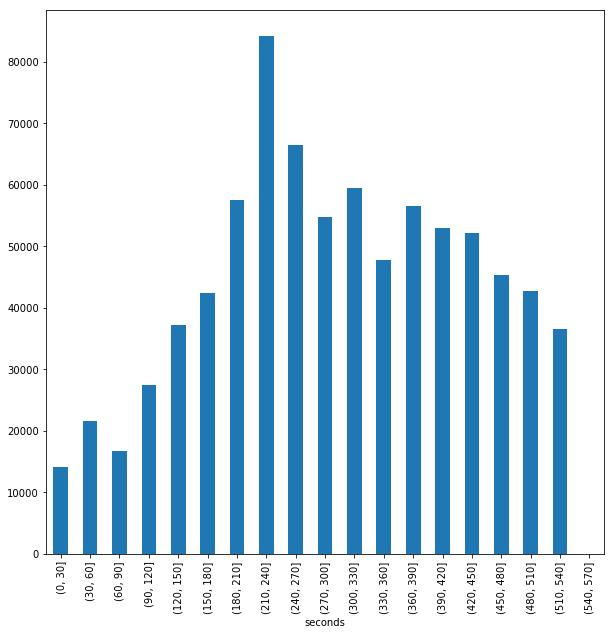

In [88]:
plt.figure(figsize=(10, 10))
sample.groupby(pd.cut(sample['seconds'], np.arange(0, 600, 30)))['views'].mean().plot(kind='bar')

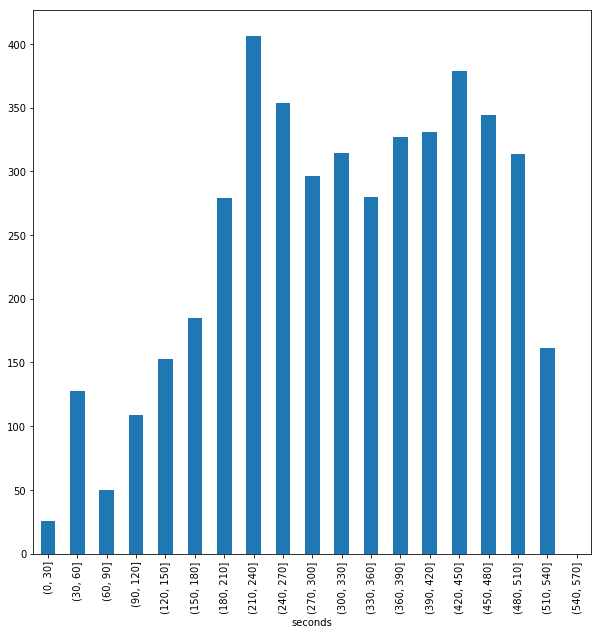

In [102]:
plt.figure(figsize=(10, 10))
subset = sample.query('likes >= 0')
subset.groupby(pd.cut(subset['seconds'], np.arange(0, 600, 30)))['likes'].mean().plot(kind='bar')

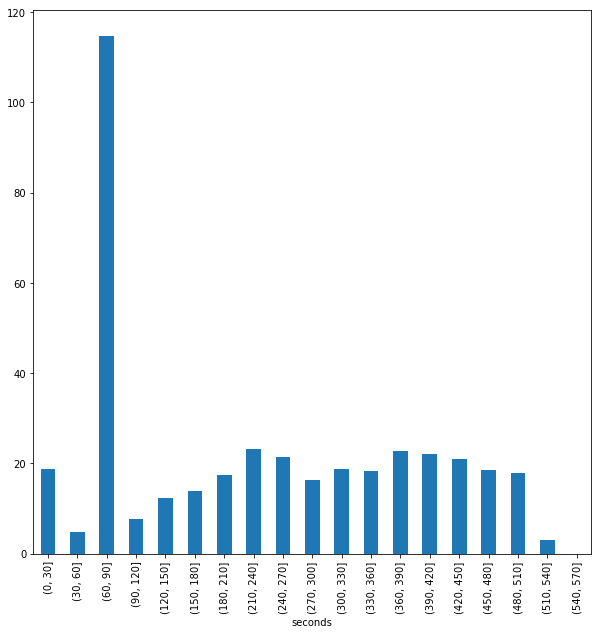

In [103]:
plt.figure(figsize=(10, 10))
subset = sample.query('dislikes >= 0')
subset.groupby(pd.cut(subset['seconds'], np.arange(0, 600, 30)))['dislikes'].mean().plot(kind='bar')

In [91]:
sample['dislikes'].describe()

count    681819.000000
mean         -2.369214
std         381.684050
min        -999.000000
25%           0.000000
50%           1.000000
75%           5.000000
max      207118.000000
Name: dislikes, dtype: float64

In [92]:
sample['likes'].describe()

count    6.818190e+05
mean     2.605464e+02
std      4.246167e+03
min     -9.990000e+02
25%      5.000000e+00
50%      1.600000e+01
75%      5.700000e+01
max      1.092042e+06
Name: likes, dtype: float64

In [93]:
sample['views'].describe()

count    6.818190e+05
mean     5.505057e+04
std      9.537031e+05
min      1.001000e+03
25%      2.147000e+03
50%      4.635000e+03
75%      1.461900e+04
max      2.899425e+08
Name: views, dtype: float64

In [132]:
channel_views = sample.groupby('channel_id')['views'].sum().sort_values()

In [133]:
channel_views.head()

channel_id
UCoChejQ0uLnntqt8hrBhAMQ    1001
UCsAmEdzw4Yw6N5iRd_zXwIQ    1001
UCuOTlY46Dz0wboOHoLu7HVA    1001
UC2nWhRLSKMC_867sevSj7Gw    1002
UC_v5FDlEfCJ1SOiBLKl_yNA    1002
Name: views, dtype: int64

In [134]:
cumsums = [0]
for n in channel_views:
    cumsums += [cumsums[-1] + n]

In [135]:
cum_table = pd.DataFrame({'percentile': np.linspace(0, 1, len(cumsums)), 'cum_views': cumsums / cumsums[-1]})

In [136]:
cum_table.head()

,cum_views,percentile
0,0.000000e+00,0.000000
1,2.666878e-08,0.000002
2,5.333756e-08,0.000004
3,8.000634e-08,0.000006
4,1.067018e-07,0.000007


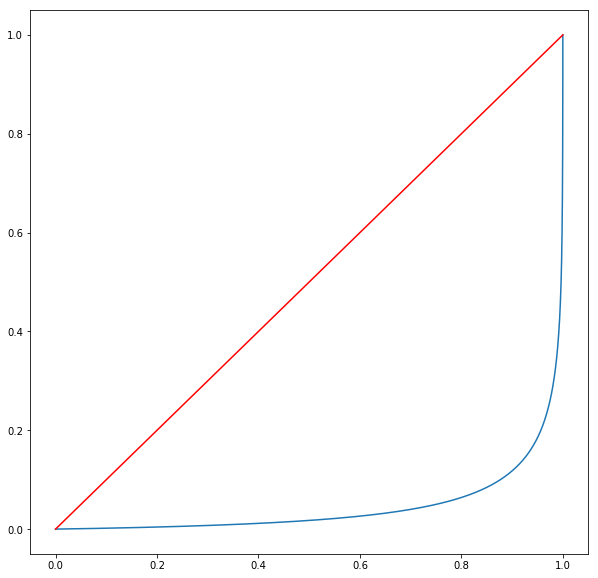

In [155]:
plt.figure(figsize=(10, 10))
plt.plot(cum_table['percentile'], cum_table['cum_views'])
plt.plot([0, 1], [0, 1], color='red')
plt.show()

In [139]:
auc = np.trapz(cum_table['cum_views'], cum_table['percentile'])

In [140]:
1 - 2 * auc

0.91055932623562874

/home/mithrillion/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/mithrillion/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


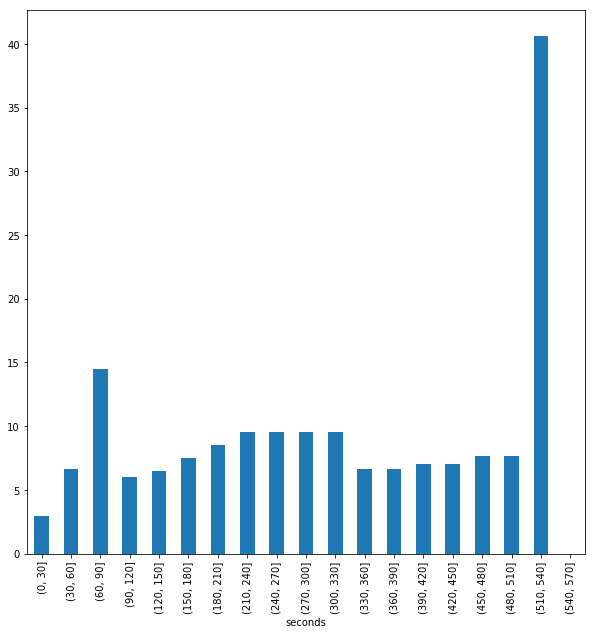

In [158]:
plt.figure(figsize=(10, 10))
subset = sample.query('likes >= 0 and dislikes >= 0')
subset.groupby(pd.cut(subset['seconds'], np.arange(0, 600, 30))).\
    apply(lambda x: (np.median(x['likes']) + 1) / (np.median(x['dislikes']) + 1)).plot(kind='bar')